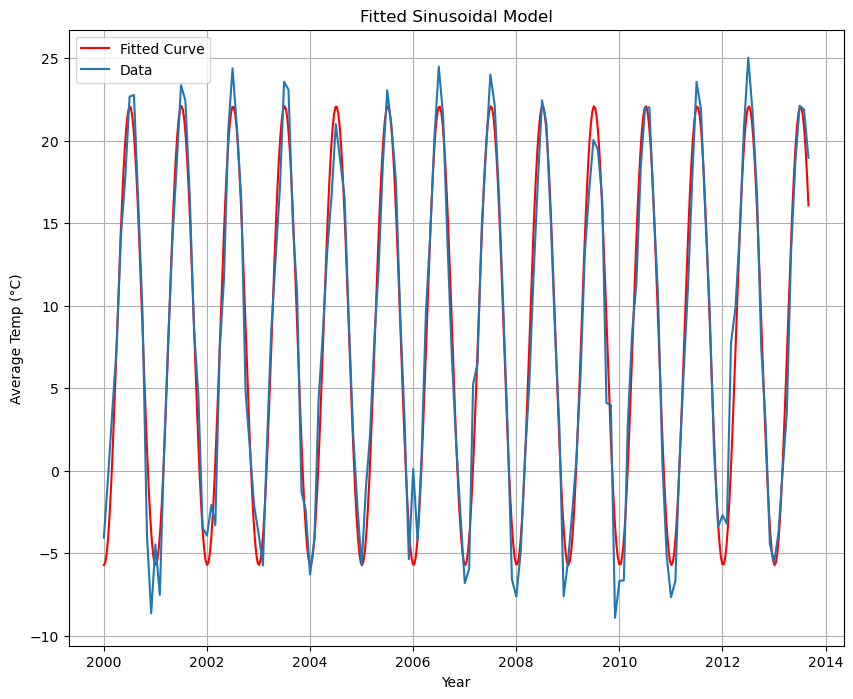

A = -13.912 ± 0.225
B = 6.279 ± 0.004
C = 7.505 ± 8.294
D = 8.181 ± 0.160
Model: y = -13.912 * cos(6.279 * x + 7.505) + 8.181


In [168]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
import scipy.optimize as scipy
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


## 1.1

df = ps.read_csv('GlobalLandTemperaturesByState.csv') #read the file

df = df[['dt', 'AverageTemperature', 'State']] #converts data to only three chosen columns 

df['dt'] = pd.to_datetime(df['dt'])  #'dt' is datetime format (resourced stack exchanged for this)
df = df[df['dt'] >= '2000-01-01'] #changes df to years on or after 2000-01-01

states = ['Wyoming', 'Nebraska', 'South Dakota'] #states to keep, all others are voided
df = df[df['State'].isin(states)] #changed df to only chosen states

## 1.2


df = df.groupby('dt')['AverageTemperature'].mean().reset_index() # group by date and take average (mean) of temperature 
#reset index numbers the rows correctly after grouping
df.columns = ['Date', 'AvgTemp']  # rename columns

## 1.4
df['YearFloat'] = df['Date'].dt.year + df['Date'].dt.dayofyear / 365 
#searched this up on stack exchange, it basically turns it into a float as a fractional year 
#based on the month and day following the year number

## 1.5
# plot follows some form of wave function, so model is a sinusoidal function with 4 parameters
def fit_model(x, A, B, C, D):
    return A * np.cos(B * x + C) + D

p0 = [10, 2 * np.pi, 0, df['AvgTemp'].mean()]  #initial guesses for params

## 1.6

params, covariance = scipy.curve_fit(fit_model, df['YearFloat'], df['AvgTemp'], p0=p0)

## 1.3 & 1.7
# plotting

x_fit = np.linspace(df['YearFloat'].min(), df['YearFloat'].max(), 500)
y_fit = fit_model(x_fit, *params)
plt.figure(figsize = (10, 8))
plt.plot(x_fit, y_fit, label="Fitted Curve", color='red')
plt.plot(df['YearFloat'], df['AvgTemp'], label='Data')
plt.xlabel("Year")
plt.ylabel("Average Temp (°C)")
plt.title("Fitted Sinusoidal Model")
plt.legend()
plt.grid(True)
plt.show()

## 1.8
# print(np.sqrt(covariance))
errors = np.sqrt(np.diag(covariance)) # error  = sqrt{covariance diagonals}

## 1.9

param_names = ['A', 'B', 'C', 'D']
print(f"{param_names[0]} = {params[0]:.3f} ± {errors[0]:.3f}") # prints the param and its correspinding error
print(f"{param_names[1]} = {params[1]:.3f} ± {errors[1]:.3f}")
print(f"{param_names[2]} = {params[2]:.3f} ± {errors[2]:.3f}")
print(f"{param_names[3]} = {params[3]:.3f} ± {errors[3]:.3f}")
print(f"Model: y = {params[0]:.3f} * cos({params[1]:.3f} * x + {params[2]:.3f}) + {params[3]:.3f}") # prints model equation

